## Libraries and Setup Jargon
Run the following cells to set up the notebook.

When prompted for a selection, select the number that is associated with java 8 (this should be option 2)

In [ ]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
0 upgraded, 15 newly installed, 0 to remove and 37 not upgraded.
Need to get 43.5 MB of archives.
After this 

In [ ]:
# Sklearn and Pandas Setup

import pandas as pd
print(pd.__version__ == '1.1.5')
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os

True


In [ ]:
!apt update
!apt install gcc python-dev libkrb5-dev

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [73.0 kB]
Ign:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:9 http://security.ubuntu.com/ubuntu bionic-security/multiverse amd64 Packages [26.8 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,430 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://security.ubuntu.com/ubuntu bionic-s

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

!wget -nc https://storage.googleapis.com/penn-cis545/combined_anime.csv -O anime.csv

--2021-11-12 09:31:19--  https://storage.googleapis.com/penn-cis545/combined_anime.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.217.1.208, 172.217.0.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 448845499 (428M) [text/csv]
Saving to: ‘anime.csv’

anime.csv           100%[===================>] 428.05M   185MB/s    in 2.3s    

2021-11-12 09:31:22 (185 MB/s) - ‘anime.csv’ saved [448845499/448845499]



## **1** Machine Learning with Sklearn


### **1.1** Data Loading and Preprocessing

#### **1.1.1** Loading Combined CSVs
We are using two CSVs for this homework, `anime.csv` and `anime_ratings.csv` from the [MyAnimeList](https://www.kaggle.com/azathoth42/myanimelist?select=animelists_cleaned.csv) dataset.. The ratings correspond to each anime and can be joined on the shared column, `anime_id`. Since the files are very large, we went ahead and joined the files for you and took a random sample of 1% (this will give ~300000 rows, which is sufficient) using the sample function in Pandas.

Load `anime.csv` as `anime_df`.

In [ ]:
anime_df = pd.read_csv('/content/anime.csv')
anime_df

,Unnamed: 0,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,28282899,Zukin-Man,10020,4,2013-01-29,2013-01-29,9,2,NaN,0,2013-01-30 05:06:16,"comedy, school, otaku humor, romance, WIN",Ore no Imouto ga Konnani Kawaii Wake ga Nai Sp...,OreImo Specials,俺の妹がこんなに可愛いわけがない,My Little Sister Can&#039;t Be This Cute Specials,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Light novel,4,Finished Airing,False,"Feb 22, 2011 to May 31, 2011","{'from': '2011-02-22', 'to': '2011-05-31'}",28 min. per ep.,PG-13 - Teens 13 or older,7.57,83849,1435.0,658,127176,176,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 13667, 'type': 'man...",Aniplex,Aniplex of America,AIC Build,"Slice of Life, Comedy","['""irony"" by ClariS']","['#1: ""READY"" by Ayana Taketatsu (ep 1)', '#2:...",28.0,2011.0
1,19028665,AluPachi,19111,13,2014-09-11,2014-09-17,9,2,NaN,0,2014-09-17 21:26:52,NaN,Love Live! School Idol Project 2nd Season,Love Live! School Idol Project 2,ラブライブ! School idol project 2期,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Other,13,Finished Airing,False,"Apr 6, 2014 to Jun 29, 2014","{'from': '2014-04-06', 'to': '2014-06-29'}",23 min. per ep.,PG-13 - Teens 13 or older,7.99,79740,570.0,599,138715,2475,The series also has released a mobile rhythm g...,Spring 2014,Sundays at 22:30 (JST),"{'Prequel': [{'mal_id': 15051, 'type': 'anime'...","Bandai Visual, Lantis, Bushiroad","NIS America, Inc.",Sunrise,"Music, School, Slice of Life","['""Sore wa Bokutachi no Kiseki (それは僕たちの奇跡)"" by...","['#01: ""Sore wa Bokutachi no Kiseki (それは僕たちの奇跡...",23.0,2014.0
2,19491144,huop,30484,4,2018-04-11,0000-00-00,10,1,0.0,0,2018-05-08 15:55:41,NaN,Steins;Gate 0,NaN,シュタインズ・ゲート ゼロ,"Steins,Gate Zero",https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,23,Currently Airing,True,"Apr 12, 2018 to ?","{'from': '2018-04-12', 'to': None}",23 min. per ep.,PG-13 - Teens 13 or older,9.15,26739,4.0,323,223989,1882,NaN,Spring 2018,Thursdays at 01:35 (JST),"{'Adaptation': [{'mal_id': 107548, 'type': 'ma...",Nitroplus,Funimation,White Fox,"Sci-Fi, Thriller","['""Fatima (ファティマ)"" by Kanako Itou']","['""LAST GAME"" by Zwei']",23.0,2018.0
3,15480301,aL1v3,8888,1,2012-10-09,2012-10-09,7,2,NaN,0,2012-10-09 17:52:55,NaN,Code Geass: Boukoku no Akito 1 - Yokuryuu wa M...,Code Geass: Akito the Exiled - The Wyvern Arrives,コードギアス 亡国のアキト 第１章「翼竜は舞い降りた」,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,1,Finished Airing,False,"Jul 16, 2012","{'from': '2012-07-16', 'to': '2012-07-16'}",51 min.,R - 17+ (violence & profanity),7.56,57690,1459.0,756,114530,483,The first episode was pre-aired on July 16 and...,NaN,NaN,"{'Adaptation': [{'mal_id': 95655, 'type': 'man...","Bandai Visual, Bandai, Bandai Namco Entertainm...",Funimation,Sunrise,"Action, Mecha, Military, Sci-Fi",[],"['""More Than Words"" by Maaya Sakamoto']",51.0,2012.0
4,16428114,LNA_Ichiro,15225,12,0000-00-00,0000-00-00,7,2,0.0,0,2017-03-05 15:54:16,NaN,Hentai Ouji to Warawanai Neko.,"The ""Hentai"" Prince and the Stony Cat.",変態王子と笑わない猫。,HenNeko,https://myanimelist.cdn-dena.com/images/anime/...,TV,Light novel,12,Finished Airing,False,"Apr 13, 2013 to Jun 29, 2013","{'from': '2013-04-13', 'to': '2013-06-29'}",24 min. per ep.,PG-13 - Teens 13 or older,7.39,148188,2068.0,255,268962,1464,NaN,Spring 2013,Saturdays at 22:30 (JST),"{'Adaptation': [{'mal_id': 25876, 'type': 'man...","Frontier Works, Media Factory, Furyu",Sentai Filmworks,J.C.Staff,"Harem, Comedy, Supernatural, Romance, School","['""Fantastic future"" by Yukari Tamura']","['""Baby Sweet Berry Love"" by Yui Ogura']",24.0,2013.0
...,...,...,...,...,...,...,...,.

#### **1.1.2** Drop NaN Values
Remove all the rows that have NaN in `anime_id` or `genre` and drop the column `Unnamed: 0` as well. Store this into anime_df.

In [ ]:
anime_df = anime_df.dropna(subset=['anime_id','genre'])
anime_df= anime_df.drop(columns=['Unnamed: 0'])

In [ ]:
anime_df

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,Zukin-Man,10020,4,2013-01-29,2013-01-29,9,2,NaN,0,2013-01-30 05:06:16,"comedy, school, otaku humor, romance, WIN",Ore no Imouto ga Konnani Kawaii Wake ga Nai Sp...,OreImo Specials,俺の妹がこんなに可愛いわけがない,My Little Sister Can&#039;t Be This Cute Specials,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Light novel,4,Finished Airing,False,"Feb 22, 2011 to May 31, 2011","{'from': '2011-02-22', 'to': '2011-05-31'}",28 min. per ep.,PG-13 - Teens 13 or older,7.57,83849,1435.0,658,127176,176,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 13667, 'type': 'man...",Aniplex,Aniplex of America,AIC Build,"Slice of Life, Comedy","['""irony"" by ClariS']","['#1: ""READY"" by Ayana Taketatsu (ep 1)', '#2:...",28.0,2011.0
1,AluPachi,19111,13,2014-09-11,2014-09-17,9,2,NaN,0,2014-09-17 21:26:52,NaN,Love Live! School Idol Project 2nd Season,Love Live! School Idol Project 2,ラブライブ! School idol project 2期,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Other,13,Finished Airing,False,"Apr 6, 2014 to Jun 29, 2014","{'from': '2014-04-06', 'to': '2014-06-29'}",23 min. per ep.,PG-13 - Teens 13 or older,7.99,79740,570.0,599,138715,2475,The series also has released a mobile rhythm g...,Spring 2014,Sundays at 22:30 (JST),"{'Prequel': [{'mal_id': 15051, 'type': 'anime'...","Bandai Visual, Lantis, Bushiroad","NIS America, Inc.",Sunrise,"Music, School, Slice of Life","['""Sore wa Bokutachi no Kiseki (それは僕たちの奇跡)"" by...","['#01: ""Sore wa Bokutachi no Kiseki (それは僕たちの奇跡...",23.0,2014.0
2,huop,30484,4,2018-04-11,0000-00-00,10,1,0.0,0,2018-05-08 15:55:41,NaN,Steins;Gate 0,NaN,シュタインズ・ゲート ゼロ,"Steins,Gate Zero",https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,23,Currently Airing,True,"Apr 12, 2018 to ?","{'from': '2018-04-12', 'to': None}",23 min. per ep.,PG-13 - Teens 13 or older,9.15,26739,4.0,323,223989,1882,NaN,Spring 2018,Thursdays at 01:35 (JST),"{'Adaptation': [{'mal_id': 107548, 'type': 'ma...",Nitroplus,Funimation,White Fox,"Sci-Fi, Thriller","['""Fatima (ファティマ)"" by Kanako Itou']","['""LAST GAME"" by Zwei']",23.0,2018.0
3,aL1v3,8888,1,2012-10-09,2012-10-09,7,2,NaN,0,2012-10-09 17:52:55,NaN,Code Geass: Boukoku no Akito 1 - Yokuryuu wa M...,Code Geass: Akito the Exiled - The Wyvern Arrives,コードギアス 亡国のアキト 第１章「翼竜は舞い降りた」,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,1,Finished Airing,False,"Jul 16, 2012","{'from': '2012-07-16', 'to': '2012-07-16'}",51 min.,R - 17+ (violence & profanity),7.56,57690,1459.0,756,114530,483,The first episode was pre-aired on July 16 and...,NaN,NaN,"{'Adaptation': [{'mal_id': 95655, 'type': 'man...","Bandai Visual, Bandai, Bandai Namco Entertainm...",Funimation,Sunrise,"Action, Mecha, Military, Sci-Fi",[],"['""More Than Words"" by Maaya Sakamoto']",51.0,2012.0
4,LNA_Ichiro,15225,12,0000-00-00,0000-00-00,7,2,0.0,0,2017-03-05 15:54:16,NaN,Hentai Ouji to Warawanai Neko.,"The ""Hentai"" Prince and the Stony Cat.",変態王子と笑わない猫。,HenNeko,https://myanimelist.cdn-dena.com/images/anime/...,TV,Light novel,12,Finished Airing,False,"Apr 13, 2013 to Jun 29, 2013","{'from': '2013-04-13', 'to': '2013-06-29'}",24 min. per ep.,PG-13 - Teens 13 or older,7.39,148188,2068.0,255,268962,1464,NaN,Spring 2013,Saturdays at 22:30 (JST),"{'Adaptation': [{'mal_id': 25876, 'type': 'man...","Frontier Works, Media Factory, Furyu",Sentai Filmworks,J.C.Staff,"Harem, Comedy, Supernatural, Romance, School","['""Fantastic future"" by Yukari Tamura']","['""Baby Sweet Berry Love"" by Yui Ogura']",24.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

### **1.2** EDA

**EDA:** Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.


#### **1.2.1** Mean, Standard Deviation, Min, and Max

Compute some simple statistics like mean, standard deviation, min and max for each of the following numerical features in the dataset and store them into lists in order `[episodes, duration_min, score, popularity]`

means = `[episodes_mean, duration_min_mean, score_mean, popularity_mean]` and similarly for mins, maxes and stds.

In [ ]:
anime_df['episodes'].std()

39.553831772491144

In [ ]:
means=[anime_df['episodes'].mean(), anime_df['duration_min'].mean(), anime_df['score'].mean(),anime_df['popularity'].mean()]
stds=[anime_df['episodes'].std(), anime_df['duration_min'].std(), anime_df['score'].std(),anime_df['popularity'].std()]
maxes=[anime_df['episodes'].max(), anime_df['duration_min'].max(), anime_df['score'].max(),anime_df['popularity'].max()]
mins=[anime_df['episodes'].min(), anime_df['duration_min'].min(), anime_df['score'].min(),anime_df['popularity'].min()]
print(maxes)
print(mins)
print(stds)
print(means)

[1787, 163.0, 9.25, 14429]
[0, 0.0, 0.0, 1]
[39.553831772491144, 24.362906828210985, 0.6919855132749758, 1309.4865053882259]
[19.436704814270186, 31.22884459646653, 7.577791317689161, 1136.7504763122563]


#### **1.2.2** Rank and Popularity

Note that the **rank** of an anime refers to its ranking based on score, whereas the **popularity** of an anime refers to how many people are watching the anime itself.

We want to establish that anime with highest ratings tend to be the most popular. In other words, people tend to watch anime with high user scores.

However, note that rank and popularity are correlated, but are not identical. As seen below, the most popular anime are not necessarily the highest rated, although there is overlap.


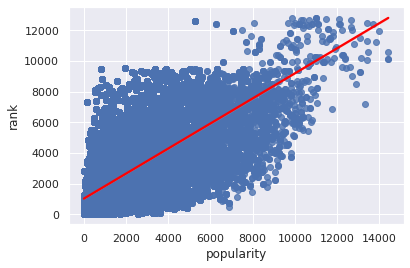

In [ ]:
sns.set(color_codes=True)
ax = sns.regplot(x="popularity", y="rank", data=anime_df,line_kws={'color':'red'})

#### **1.2.3** Correlation of Feature Variables

Create a correlation table **and** heatmap for the features in `anime_df`. Look into how to use seaborn library to do this (imported as sns above)!

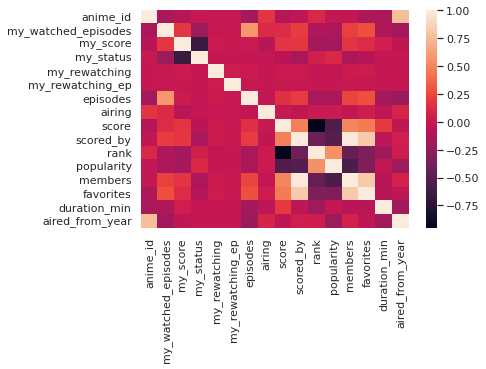

In [ ]:
anime_corr = anime_df.corr()

anime_heatmp=sns.heatmap(anime_corr)

In [ ]:
anime_corr

,anime_id,my_watched_episodes,my_score,my_status,my_rewatching,my_rewatching_ep,episodes,airing,score,scored_by,rank,popularity,members,favorites,duration_min,aired_from_year
anime_id,1.000000,-0.121743,-0.060025,0.003558,-0.011396,-0.007787,-0.159015,0.169760,-0.076832,-0.031955,0.103139,-0.024584,-0.019499,-0.105476,-0.134667,0.767988
my_watched_episodes,-0.121743,1.000000,0.180694,-0.188937,0.009553,0.004817,0.580564,0.123724,0.125203,0.202746,-0.111332,-0.119686,0.218533,0.279260,-0.102444,-0.154769
my_score,-0.060025,0.180694,1.000000,-0.649882,0.021068,0.008039,0.024849,-0.065521,0.170083,0.179136,-0.164626,-0.157709,0.171043,0.130092,0.051172,-0.029926
my_status,0.003558,-0.188937,-0.649882,1.000000,-0.017675,-0.004724,-0.016061,-0.009149,-0.055940,-0.123381,0.059068,0.111244,-0.115161,-0.075922,-0.009839,-0.002656
my_rewatching,-0.011396,0.009553,0.021068,-0.017675,1.000000,0.029231,0.020074,-0.000966,0.017468,0.023382,-0.014338,-0.013375,0.023969,0.030867,-0.004937,-0.009881
my_rewatching_ep,-0.007787,0.004817,0.008039,-0.004724,0.029231,1.000000,0.003700,-0.000887,0.003720,0.006834,-0.004122,-0.003216,0.006094,0.008091,-0.002467,-0.008366
episodes,-0.159015,0.580564,0.024849,-0.016061,0.020074,0.003700,1.000000,-0.022290,0.149656,0.206089,-0.135543,-0.126158,0.242032,0.286186,-0.155244,-0.196229
airing,0.169760,0.123724,-0.065521,-0.009149,-0.000966,-0.000887,-0.022290,1.000000,0.002271,-0.034875,0.019071,0.022716,-0.015783,0.036015,-0.040590,0.092207
score,-0.076832,0.125203,0.170083,-0.055940,0.017468,0.003720,0.149656,0.002271,1.000000,0.478973,-0.950244,-0.542743,0.512151,0.459681,0.198048,-0.028901
scored_by,-0.031955,0.202746,0.179136,-0.123381,0.023382,0.006834,0.206089,-0.034875,0.478973,1.000000,-0.404803,-0.514351,0.988397,0.829139,-0.035934,0.052701


#### **1.2.4** Explore Other Features
As a next step, we will try to gain insights into the data using some of the other attributes.
Create a new dataframe, `popular_studio`, where you group by `studio` and `type` (in that order) and find the sum of `popularity`. Sort the values in decreasing order of popularity and create a bar plot with the first 30 rows of 
`popular_studio`. Plot  `studio` on the x-axis and `popularity` on y_axis and make sure that for each studio there is a bar for the popularity sum for each type of show produced by that studio.(for e.g if a studio has type TV and Movie, there should be 2 bars for that studio) Please use the seaborn library for this plot!

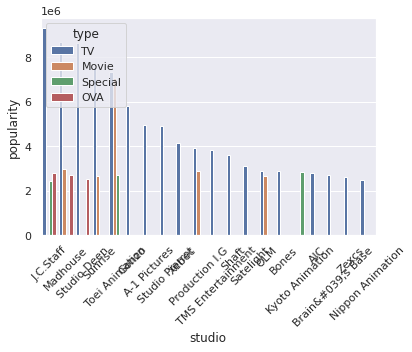

In [ ]:
popular_studio= anime_df[['studio','type','popularity']].groupby(by=['studio','type']).sum()
popular_studio=popular_studio.reset_index()
popular_studio=popular_studio.sort_values(by='popularity', ascending=False).head(30)
popplot=sns.barplot(x='studio', y='popularity', hue='type', data=popular_studio)
popplot.set_xticklabels(popplot.get_xticklabels(), rotation=45)
sns.set(rc={'figure.figsize':(20,10)})

### **1.3** Feature Engineering

**Feature Engineering:** Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms.

#### **1.3.1** Processing Genres

As shown in the output of all the entries in the genre column, one anime can have multiple genres, of which are represented in the column separated by commas. As such, in order to make the data useful as feature variables, we will split the genres listed such that each row contains one listed genre. If a particular anime_id has 2 genres, that row will appear twice for each of the genres. 

Hint: See the `explode()` function

In [ ]:
anime_df['genre']=list(anime_df['genre'].str.split(","))
anime_df=anime_df.explode('genre')

In [ ]:
anime_df

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,Zukin-Man,10020,4,2013-01-29,2013-01-29,9,2,NaN,0,2013-01-30 05:06:16,"comedy, school, otaku humor, romance, WIN",Ore no Imouto ga Konnani Kawaii Wake ga Nai Sp...,OreImo Specials,俺の妹がこんなに可愛いわけがない,My Little Sister Can&#039;t Be This Cute Specials,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Light novel,4,Finished Airing,False,"Feb 22, 2011 to May 31, 2011","{'from': '2011-02-22', 'to': '2011-05-31'}",28 min. per ep.,PG-13 - Teens 13 or older,7.57,83849,1435.0,658,127176,176,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 13667, 'type': 'man...",Aniplex,Aniplex of America,AIC Build,Slice of Life,"['""irony"" by ClariS']","['#1: ""READY"" by Ayana Taketatsu (ep 1)', '#2:...",28.0,2011.0
0,Zukin-Man,10020,4,2013-01-29,2013-01-29,9,2,NaN,0,2013-01-30 05:06:16,"comedy, school, otaku humor, romance, WIN",Ore no Imouto ga Konnani Kawaii Wake ga Nai Sp...,OreImo Specials,俺の妹がこんなに可愛いわけがない,My Little Sister Can&#039;t Be This Cute Specials,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Light novel,4,Finished Airing,False,"Feb 22, 2011 to May 31, 2011","{'from': '2011-02-22', 'to': '2011-05-31'}",28 min. per ep.,PG-13 - Teens 13 or older,7.57,83849,1435.0,658,127176,176,NaN,NaN,NaN,"{'Adaptation': [{'mal_id': 13667, 'type': 'man...",Aniplex,Aniplex of America,AIC Build,Comedy,"['""irony"" by ClariS']","['#1: ""READY"" by Ayana Taketatsu (ep 1)', '#2:...",28.0,2011.0
1,AluPachi,19111,13,2014-09-11,2014-09-17,9,2,NaN,0,2014-09-17 21:26:52,NaN,Love Live! School Idol Project 2nd Season,Love Live! School Idol Project 2,ラブライブ! School idol project 2期,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Other,13,Finished Airing,False,"Apr 6, 2014 to Jun 29, 2014","{'from': '2014-04-06', 'to': '2014-06-29'}",23 min. per ep.,PG-13 - Teens 13 or older,7.99,79740,570.0,599,138715,2475,The series also has released a mobile rhythm g...,Spring 2014,Sundays at 22:30 (JST),"{'Prequel': [{'mal_id': 15051, 'type': 'anime'...","Bandai Visual, Lantis, Bushiroad","NIS America, Inc.",Sunrise,Music,"['""Sore wa Bokutachi no Kiseki (それは僕たちの奇跡)"" by...","['#01: ""Sore wa Bokutachi no Kiseki (それは僕たちの奇跡...",23.0,2014.0
1,AluPachi,19111,13,2014-09-11,2014-09-17,9,2,NaN,0,2014-09-17 21:26:52,NaN,Love Live! School Idol Project 2nd Season,Love Live! School Idol Project 2,ラブライブ! School idol project 2期,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Other,13,Finished Airing,False,"Apr 6, 2014 to Jun 29, 2014","{'from': '2014-04-06', 'to': '2014-06-29'}",23 min. per ep.,PG-13 - Teens 13 or older,7.99,79740,570.0,599,138715,2475,The series also has released a mobile rhythm g...,Spring 2014,Sundays at 22:30 (JST),"{'Prequel': [{'mal_id': 15051, 'type': 'anime'...","Bandai Visual, Lantis, Bushiroad","NIS America, Inc.",Sunrise,School,"['""Sore wa Bokutachi no Kiseki (それは僕たちの奇跡)"" by...","['#01: ""Sore wa Bokutachi no Kiseki (それは僕たちの奇跡...",23.0,2014.0
1,AluPachi,19111,13,2014-09-11,2014-09-17,9,2,NaN,0,2014-09-17 21:26:52,NaN,Love Live! School Idol Project 2nd Season,Love Live! School Idol Project 2,ラブライブ! School idol project 2期,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Other,13,Finished Airing,False,"Apr 6, 2014 to Jun 29, 2014","{'from': '2014-04-06', 'to': '2014-06-29'}",23 min. per ep.,PG-13 - Teens 13 or older,7.99,79740,570.0,599,138715,2475,The series also has released a mobile rhythm g...,Spring 2014,Sundays at 22:30 (JST),"{'Prequel': [{'mal_id': 15051, 'type': 'anime'...","Bandai Visual, Lantis, Bushiroad","NIS America, Inc.",Sunrise,Slice of Life,"['""Sore wa Bokutachi no Kiseki (それは僕たちの奇跡

#### **1.3.2** Drop Some Columns

Create a new dataframe, `new_anime_df` that contains only the following columns: anime_id, username, title, score, scored_by, rank, popularity, members, source, favorites, studio, genre. Then drop all the rows that contain NaN in new_anime_df.

In [ ]:
new_anime_df=anime_df[['anime_id','username','title','score','scored_by','rank','popularity','members', 'source', 'favorites', 'studio', 'genre']]
new_anime_df=new_anime_df.dropna()

####**1.3.3** Encode Categorical Variables using LabelEncoder

Identify the remaining categorical features and convert them into one hot vectors. There are **4 categorical variables that need to be encoded**, `genre`, `studio`, `source`, and `title`.

To do this, we use the [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) in the sklearn package. Make sure you keep track of the mappings for reference.

Assign all labels to `new_anime_df` as `genre_labels`, `studio_labels`, `source_labels`, and `title_labels`.

Plot the correlation matrix again after assigning the labels and observe the  matrix to determine if there is signifcant linear relationships between some feature variables and others.

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelen = LabelEncoder()

labelen.fit(new_anime_df['genre'])
genre=labelen.fit_transform(new_anime_df['genre'])
genre_labels=labelen.classes_
x=list(labelen.transform(genre_labels))

# genre mappings
genre_map=[]
for i in range(len(x)):
  genre_map.append([genre_labels[i],x[i]])

labelen.fit(new_anime_df['studio'])
studio=labelen.fit_transform(new_anime_df['studio'])
studio_labels=labelen.classes_
x=list(labelen.transform(studio_labels))
# studio mappings
studio_map=[]
for i in range(len(x)):
  studio_map.append([studio_labels[i],x[i]])

source=labelen.fit(new_anime_df['source'])
source=labelen.fit_transform(new_anime_df['source'])
source_labels=labelen.classes_
x=list(labelen.transform(source_labels))
# source mappings
source_map=[]
for i in range(len(x)):
  source_map.append([source_labels[i],x[i]])

title=labelen.fit(new_anime_df['title'])
title=labelen.fit_transform(new_anime_df['title'])
title_labels=labelen.classes_
x=list(labelen.transform(title_labels))
# title mappings
title_map=[]
for i in range(len(x)):
  title_map.append([title_labels[i],x[i]])

In [ ]:
new_anime_df['genre_labels'] = genre
new_anime_df['studio_labels'] = studio
new_anime_df['source_labels'] = source
new_anime_df['title_labels'] = title

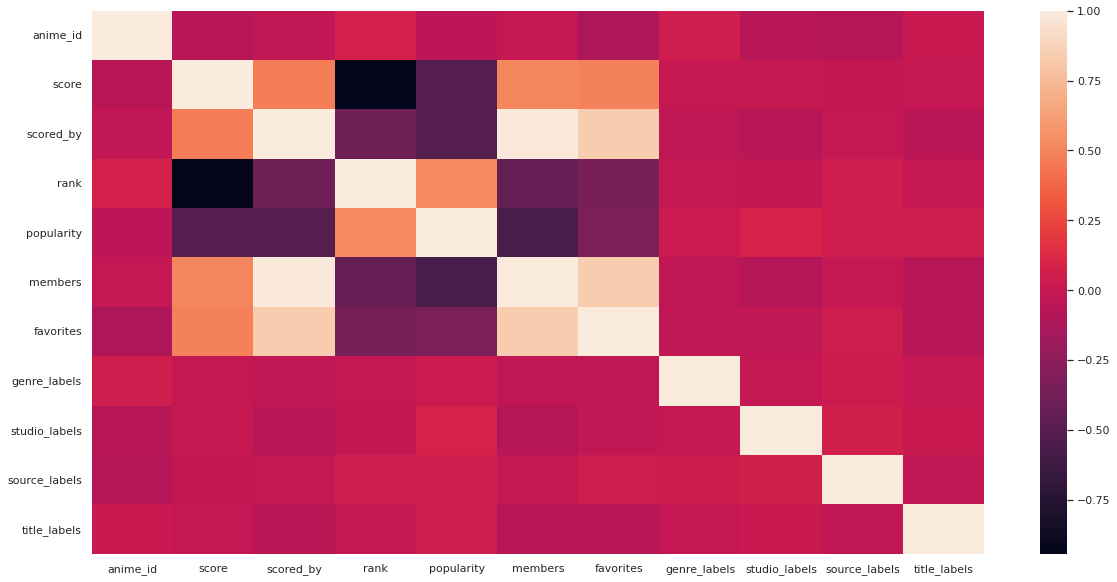

In [ ]:
updated_anime_corr = new_anime_df.corr()
# correlation matrix
updated_anime_corr=sns.heatmap(updated_anime_corr)

#### **1.3.4** Score Mean Threshold

In the parts below, we will use machine learning to predict how good an anime is (high score or low score). As seen above, because the feature variables yielded little correlation to the outcome variable (ie. score), we are only going to investigate the anime whose rating pass a threshold. We denote these anime with a binary measure, denoted `above_average`. Add a new column `above_average` to `new_anime_df` where the value is 1  if an anime's score is above the threshhold. If not, assign it 0.

Please use the original `anime_df` to calculate the threshold - the mean score (store it as mean_score).

In [ ]:
mean_score =anime_df['score'].mean()
print(mean_score)

7.6243390424349196


In [ ]:
# 1 for above average score, 0 for below
pd.options.mode.chained_assignment = None
new_anime_df['above_average']= np.where(new_anime_df['score']>mean_score, 1, 0)

In [ ]:
new_anime_df

,anime_id,username,title,score,scored_by,rank,popularity,members,source,favorites,studio,genre,genre_labels,studio_labels,source_labels,title_labels,above_average
0,10020,Zukin-Man,Ore no Imouto ga Konnani Kawaii Wake ga Nai Sp...,7.57,83849,1435.0,658,127176,Light novel,176,AIC Build,Slice of Life,69,14,5,3724,0
0,10020,Zukin-Man,Ore no Imouto ga Konnani Kawaii Wake ga Nai Sp...,7.57,83849,1435.0,658,127176,Light novel,176,AIC Build,Comedy,2,14,5,3724,0
1,19111,AluPachi,Love Live! School Idol Project 2nd Season,7.99,79740,570.0,599,138715,Other,2475,Sunrise,Music,57,480,10,2864,1
1,19111,AluPachi,Love Live! School Idol Project 2nd Season,7.99,79740,570.0,599,138715,Other,2475,Sunrise,School,25,480,10,2864,1
1,19111,AluPachi,Love Live! School Idol Project 2nd Season,7.99,79740,570.0,599,138715,Other,2475,Sunrise,Slice of Life,32,480,10,2864,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312838,5630,Serzhunya_Baka,Higashi no Eden,7.96,173942,599.0,156,346202,Original,3733,Production I.G,Thriller,37,346,9,1959,1
312839,32902,TigreDemon,Mahoutsukai no Yome: Hoshi Matsu Hito,8.26,61403,270.0,536,150617,Manga,553,Wit Studio,Slice of Life,69,562,6,3024,1
312839,32902,TigreDemon,Mahoutsukai no Yome: Hoshi Matsu Hito,8.26,61403,270.0,536,150617,Manga,553,Wit Studio,Magic,14,562,6,3024,1
312839,32902,TigreDemon,Mahoutsukai no Yome: Hoshi Matsu Hito,8.26,61403,270.0,536,150617,Manga,553,Wit Studio,Fantasy,7,562,6,3024,1


Let's write out the modified data we created to a file so that we can reuse it in Section 2.

In [ ]:
combined_data_sec_2 = new_anime_df.copy()
combined_data_sec_2.rename(columns = {'views_log':'label'}, inplace = True) 
combined_data_sec_2.to_csv('/content/combined_anime.csv')

#### **1.3.5** Split into Features and Label

Now that we have explored and cleaned our dataset, let's prepare it for a machine learning task. In this homework, you will work with various models and attempt to predict the score of anime shows. Since we converted the scores to binary labels above, you will actually predict whether the anime show has high score (1) or low score(0) instead of the actual scores.

The features will be the encoded variables together with the following attributes: `scored_by`, `popularity`, `members` and `favorites`. The label will be the binary indicator created in 1.3.6, indicating if an anime is above average. Store these two as features and labels, respectively.

In [ ]:
features = new_anime_df[['scored_by','popularity', 'members', 'favorites','genre_labels', 'studio_labels', 'source_labels', 'title_labels']]
labels = new_anime_df['above_average']

### **1.4** Modelling

Now we will train some machine learning models using sklearn for the task defined above.

#### **1.4.1** Split Data into Train and Test

Use sklearn's `train_test_split` library and split data into train and test sets, the split should be 80-20 meaning 80% for training and rest for testing. **Please set the random_state parameter = 42** and store the resulting splits as x_train, x_test, y_train, and y_test.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

#### **1.4.2** Train Machine Learning Models

##### **1.4.2.1** Naive Bayes Classifier

Use the `GaussianNB` package in sklearn to perform Naive Bayes classification. Initialize the model with default parameters, train using the training data, and then make predictions on the test set. Save your predictions in an array named y_pred, and report your accuracy score (saved as a variable called naive_bayes_acc).

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

naivebay = GaussianNB()
naivebay.fit(x_train, y_train)
y_pred =naivebay.predict(x_test).reshape(-1,1)

In [ ]:
naive_bayes_acc=accuracy_score(y_pred, y_test)*100
print(naive_bayes_acc)

69.81055182686032


##### **1.4.2.2** Dimensionality Reduction with PCA

Use Principal component analysis to reduce number of dimensions of the dataset, as a first step fit a pca model on your train set and then plot the explained_variance_ratio against the number of components to decide the number of components you should keep. Remember that PCA is not scale invariant!

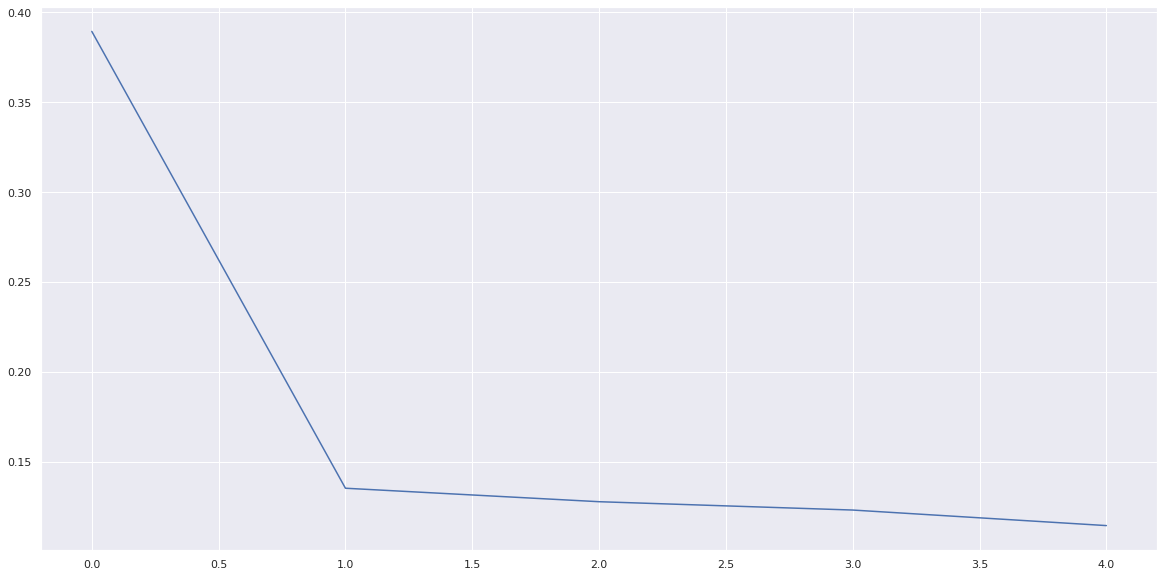

In [ ]:
from sklearn.decomposition import PCA

# scaling
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x_train)

# find num components to use
pcamod=PCA(n_components=5)
principalComponents = pcamod.fit_transform(x)

# plot for explained variance
plt.plot(pcamod.explained_variance_ratio_)

Once you've made the plot, save the array of explained variances into the variable explained_variance and the components into the variable pca_components.

In [ ]:
explained_variance = pcamod.explained_variance_ratio_
pca_components= pcamod.n_components_
print(explained_variance)

[0.38933658 0.13522987 0.12773174 0.12309461 0.11444692]


Use the plot to decide the number of components to keep, choose a number that explains at least 99.95% of variance in the dataset. Then fit and transform your PCA on training set using the number of components you decided.

Remember that your PCA should be trained on the training set (x_train) but only transformed on the test set (x_test). Overwrite those 2 variables with their transformed versions. 

In [ ]:
pca = PCA(n_components=6)
scale=StandardScaler()
x_sctr= scale.fit_transform(x_train)
x_scte= scale.transform(x_test)

x_train =  pca.fit_transform(x_sctr)
x_test =  pca.transform(x_scte)

Just to visualize what's going on (separate from what you just did), use PCA to reduce the number dimensions to 2 and plot the first 5000 rows.

In [ ]:
x_train_pca=x_sctr

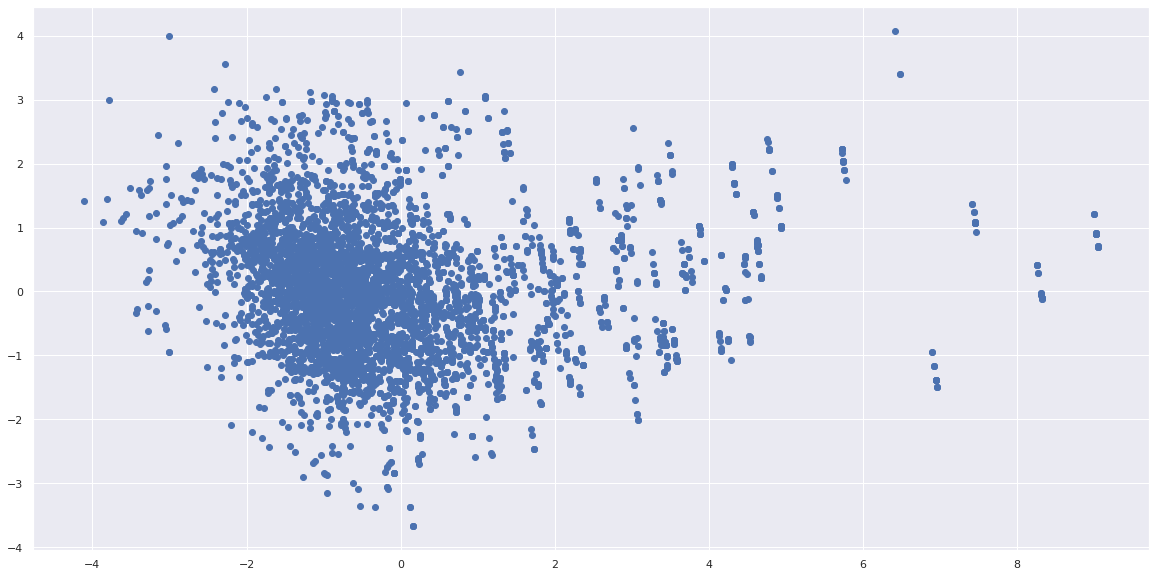

In [ ]:
# visualize 2 components of PCA
pca_plot = PCA(n_components=2)
comp = pca_plot.fit_transform(x_train_pca)
data = np.transpose(np.array(comp))
plt.scatter(data[0][0:5000], data[1][0:5000])

##### **1.4.2.3** Random Forest

Use grid search and train a random forest model on the transformed train dataset. Tune hyperparameters that are available like depth and number of estimators using grid search and select the best hyperparameters out of those.

**Random Forest is a computationally expensive task. Please make sure you set aside sufficient time and are able to run this effectively.**

In [ ]:
# print out best parameters
def print_best_params(results):
    print('best_params: {}\n'.format(results.best_params_))

In [ ]:
param_grid = { 
    'n_estimators': [10,20,30],
    'max_depth' : [5,10,15],
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier()
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
rf_cv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
print_best_params(rf_cv)

best_params: {'max_depth': 15, 'n_estimators': 20}



Fit the random forest on the training data using the parameters you computed above. Then make predictions on the test set, report the root mean squared error for the test set.

In [ ]:
rf=RandomForestClassifier(max_features='auto', max_depth= 15, n_estimators= 20)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test).reshape(-1,1)

In [ ]:
test_accuracy = accuracy_score(y_test, y_pred)*100
print(test_accuracy)

97.8368358224027


## **2** Distributed Machine learning with Spark

Apache Spark ML is the machine learning library consisting of common learning algorithms and utilities, including classification, regression, clustering, collaborative filtering, dimensionality reduction, and underlying optimization primitives.

Why Spark ML?

Moving to the Big Data Era requires heavy iterative computations on very big datasets. Standard implementations of machine learning algorithms require very powerful machines to be able to run. Depending on high-end machines is not advantageous due to their high price and improper costs of scaling up. The idea of using distributed computing engines is to distribute the calculations to multiple low-end machines (commodity hardware) instead of a single high-end one. *This definitely speeds up the learning phase and allows us to create better models.*

Read more about it with the python documentation **[here](https://spark.apache.org/docs/latest/ml-guide.html)**.

Run the code below to set up Spark (you should have already installed it in the Libraries and Setup Jargon section above).

In [ ]:
!apt install libkrb5-dev
!wget https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
! pip install pyspark --user
! pip install seaborn --user
! pip install plotly --user
! pip install imageio --user
! pip install folium --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libkrb5-dev is already the newest version (1.16-2ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 61 not upgraded.
--2021-11-12 09:50:05--  https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.95.219, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228834641 (218M) [application/x-gzip]
Saving to: ‘spark-3.1.2-bin-hadoop3.2.tgz’

spark-3.1.2-bin-had 100%[===================>] 218.23M  26.6MB/s    in 8.6s    

2021-11-12 09:50:14 (25.4 MB/s) - ‘spark-3.1.2-bin-hadoop3.2.tgz’ saved [228834641/228834641]

     |████████████████████████████████| 43 kB 1.8 MB/s 
     |████████████████████████████████| 154 kB 46.8 MB/s 
     |████████████████████████████████| 110 

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('ml-hw4').getOrCreate()

In [ ]:
%load_ext sparkmagic.magics

In [ ]:
#graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
import pandas as pd
# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-3.1.2-bin-hadoop3.2'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [ ]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)


## **2.1** Initializing Spark Data

We have the spark setup ready. Now we need the data for our ML algorithms. We will use the data you processed in Section 1 but in Spark. 

Read in the CSV that you created into a Spark dataframe (`sdf`). Make sure to set the inferSchema flag to True when you do this so that the columns are the correct datatypes and not all strings.

### **2.1.1** Loading Spark Schema and Creating VectorAssembler

In [ ]:
train_sdf = spark.read.option("quote", "\"").option('escape', "\"").csv("/content/combined_anime.csv",header=True , inferSchema='True')

In [ ]:
train_sdf.show()

+---+--------+---------------+--------------------+-----+---------+------+----------+-------+------------+---------+------------------+--------------+------------+-------------+-------------+------------+-------------+
|_c0|anime_id|       username|               title|score|scored_by|  rank|popularity|members|      source|favorites|            studio|         genre|genre_labels|studio_labels|source_labels|title_labels|above_average|
+---+--------+---------------+--------------------+-----+---------+------+----------+-------+------------+---------+------------------+--------------+------------+-------------+-------------+------------+-------------+
|  0|   10020|      Zukin-Man|Ore no Imouto ga ...| 7.57|    83849|1435.0|       658| 127176| Light novel|      176|         AIC Build| Slice of Life|          69|           14|            5|        3724|            0|
|  0|   10020|      Zukin-Man|Ore no Imouto ga ...| 7.57|    83849|1435.0|       658| 127176| Light novel|      176|        

Print out the Dataframe Schema and verify the datatypes. 


In [ ]:
train_sdf.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- anime_id: integer (nullable = true)
 |-- username: string (nullable = true)
 |-- title: string (nullable = true)
 |-- score: double (nullable = true)
 |-- scored_by: integer (nullable = true)
 |-- rank: double (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- members: integer (nullable = true)
 |-- source: string (nullable = true)
 |-- favorites: integer (nullable = true)
 |-- studio: string (nullable = true)
 |-- genre: string (nullable = true)
 |-- genre_labels: integer (nullable = true)
 |-- studio_labels: integer (nullable = true)
 |-- source_labels: integer (nullable = true)
 |-- title_labels: integer (nullable = true)
 |-- above_average: integer (nullable = true)



Great job, we have the processed data now. For Spark ML, we need to create a feature column which has all features concatenated and a single column for labels, which we already have!

We will use VectorAssembler() to create a feature vector from all categorical and numerical features and we call the final vector as “features”.

First list all columns in the data and store it in a list named all_columns.

In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

all_columns = train_sdf.columns
all_columns

['_c0',
 'anime_id',
 'username',
 'title',
 'score',
 'scored_by',
 'rank',
 'popularity',
 'members',
 'source',
 'favorites',
 'studio',
 'genre',
 'genre_labels',
 'studio_labels',
 'source_labels',
 'title_labels',
 'above_average']

Create a list of columns which you don't want to include in your features (i.e. the original columns of labels and probably other columns which don't help the machine learning model). Name this list `drop_columns`.

In [ ]:
drop_columns = ['_c0','anime_id','title','username','source', 'studio', 'genre','rank','members']

In [ ]:
columns_to_use = ['score', 'scored_by','popularity', 'favorites', 'genre_labels', 'studio_labels', 'source_labels', 'title_labels', 'above_average']
print(columns_to_use)

['score', 'scored_by', 'popularity', 'favorites', 'genre_labels', 'studio_labels', 'source_labels', 'title_labels', 'above_average']


Create a VectorAssembler object with columns you want to use. Name your output column as `features` (i.e. they are the features you wanna use later).

In [ ]:
assembler = VectorAssembler(inputCols=columns_to_use, outputCol="features")

### **2.1.2** Create Pipeline

Now we will create a pipeline with many stages. For this data, we just need a single stage with the assembler, but you could have other stages before that where you perform operations on the data like converting categorical strings in the features to numeric values, or do feature scaling operations.

In this step, we will create a pipeline with a single stage — the assembler. Fit the pipeline to your data and create the transformed dataframe and name it `modified_data_sdf`.

In [ ]:
from pyspark.ml import Pipeline

# Your code goes here
pipeline = Pipeline(stages=[assembler])
pipe = pipeline.fit(train_sdf)
modified_data_sdf=pipe.transform(train_sdf)

In [ ]:
modified_data_sdf.show()

+---+--------+---------------+--------------------+-----+---------+------+----------+-------+------------+---------+------------------+--------------+------------+-------------+-------------+------------+-------------+--------------------+
|_c0|anime_id|       username|               title|score|scored_by|  rank|popularity|members|      source|favorites|            studio|         genre|genre_labels|studio_labels|source_labels|title_labels|above_average|            features|
+---+--------+---------------+--------------------+-----+---------+------+----------+-------+------------+---------+------------------+--------------+------------+-------------+-------------+------------+-------------+--------------------+
|  0|   10020|      Zukin-Man|Ore no Imouto ga ...| 7.57|    83849|1435.0|       658| 127176| Light novel|      176|         AIC Build| Slice of Life|          69|           14|            5|        3724|            0|[7.57,83849.0,658...|
|  0|   10020|      Zukin-Man|Ore no Imo

Now that we have the data in the format we need, we will create out train and test sets. Split into an 80-20 ratio between the train and test sets. Name these `train_sdf` and `test_sdf`

In [ ]:
print(modified_data_sdf.count())

1386393


In [ ]:
train_sdf, test_sdf = modified_data_sdf.randomSplit([0.8, 0.2], seed=24)

## **2.2** Logistic Regression Using SparkML

Time to do the cool stuff, let's train a logistic regression model to our data and try to predict the views again! This time, we will use "Big" data tools. We will be using Logistic Regression for classification.

Look up the documentation online and try to understand how to implement this.

Firstly, **train a model without any regularization.**

In [ ]:
from pyspark.ml.classification import LogisticRegression

# fit on training data
lr=LogisticRegression(featuresCol="features", labelCol='above_average')
model=lr.fit(train_sdf)
predict=model.transform(train_sdf)

In [ ]:
#training accuracy
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="prediction")
evaluator.evaluate(predict)

0.9999999502907573

Now, find out how good the model actually is and see if it overfits the training data. Predict the label for above average for your test data (hint: it is called 'transform' in spark ml) and evaluate the performance using the area under the ROC curve using 'BinaryClassificationEvaluator' object in the Spark ML Regression library.

In [ ]:
# prediction and evaluation
predictions = model.transform(test_sdf)

In [ ]:
# training accuracy 
training_accuracy = evaluator.evaluate(predictions)
# performance on test data using area under roc metric
roc_evaluator = BinaryClassificationEvaluator(labelCol="prediction", metricName='areaUnderROC')
test_predictions_log = roc_evaluator.evaluate(predictions)

Now, we will add regularization to avoid overfitting. Play around with different regularization parameters - try out LASSO (L1), Ridge (L2) and elastic net (combination of L1 and L2) and different regularization hyperparameters when initializing 3 different regularized logistic regression models. Compare these with each other and the non regularized regression done above.

Make sure to evaluate the performance on test data using the same metric as above(area under ROC curve)

In [ ]:
# LASSO L1 
lr_lasso=LogisticRegression(featuresCol="features", labelCol='above_average',elasticNetParam=1)
model=lr_lasso.fit(train_sdf)
predictionsla = model.transform(test_sdf)
test_area_l1 = roc_evaluator.evaluate(predictionsla)

# RIDGE L2 
lr_ridge=LogisticRegression(featuresCol="features", labelCol='above_average',elasticNetParam=0)
model=lr_ridge.fit(train_sdf)
predictionsri = model.transform(test_sdf)
test_area_l2 = roc_evaluator.evaluate(predictionsri)

# Some variant of elastic net
lr_elastic=LogisticRegression(featuresCol="features", labelCol='above_average',elasticNetParam=0.5)
model=lr_elastic.fit(train_sdf)
predictionsel = model.transform(test_sdf)
test_area_elastic = roc_evaluator.evaluate(predictionsel)

In [ ]:
print(test_area_l1, test_area_l2, test_area_elastic)

0.9999999139982345 0.9999999139982345 0.9999999139982345


## **2.3** Random Forest Classification

As a data scientist, if you are looking to win competitions, you definitely must know about random forests, boosted trees etc. These esemble methods generalize well and work surprisingly well for a lot of classification problems and sometimes for regression problems. So let's give it a go with our problem. Just like the logistic regression model, create a random forest classifier model, fit the training data and evaluate using the area under the ROC curve metric.

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
#define model
rfc=RandomForestClassifier(featuresCol="features", labelCol='above_average')

In [ ]:
#fit on training data
model=rfc.fit(train_sdf)

In [ ]:
#predictions
predict=model.transform(train_sdf)
predictions = model.transform(test_sdf)

In [ ]:
#evaluate predictions
train_area = roc_evaluator.evaluate(predict)
test_area =  roc_evaluator.evaluate(predictions)

## **2.4** Dimensionality Reduction Using PCA

We will again use the powerful PCA to reduce the dimensions and project the data onto a lower dimensional space and so logistic regression on the new projected data. Choose an appropriate value for the number of dimensions - you already found out this number in section 1!


Steps for this section
1.   Initialize a PCA model
2.   Fit the model using the training data
3.   Get the PCA feature from the trained model
4.   Train a logistic regression model using the PCA features
5.   Evaluate the performance on the test set using the area under ROC curve metric 



In [ ]:
from pyspark.ml.feature import PCA as PCAml
pca=PCAml(k=6, inputCol="features")
model = pca.fit(train_sdf)
train_sdf = model.transform(train_sdf)
test_sdf = model.transform(test_sdf)

In [ ]:
model=lr.fit(train_sdf)
predict=model.transform(train_sdf)
predictions=model.transform(test_sdf)

In [ ]:
#evaluate predictions
training_ROC_area_pca = roc_evaluator.evaluate(predict)
test_ROC_area_pca = roc_evaluator.evaluate(predictions)